In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.15.0


In [0]:
#Loading the Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

There are 60000 training images each of size 28x28

In [0]:
test_images.shape

(10000, 28, 28)

There are 10000 testing images of size 28x28

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

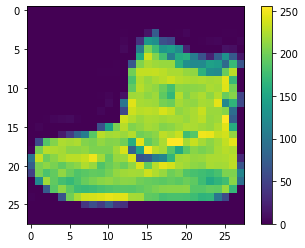

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

Scaling the data so that it lies between 0 and 1

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

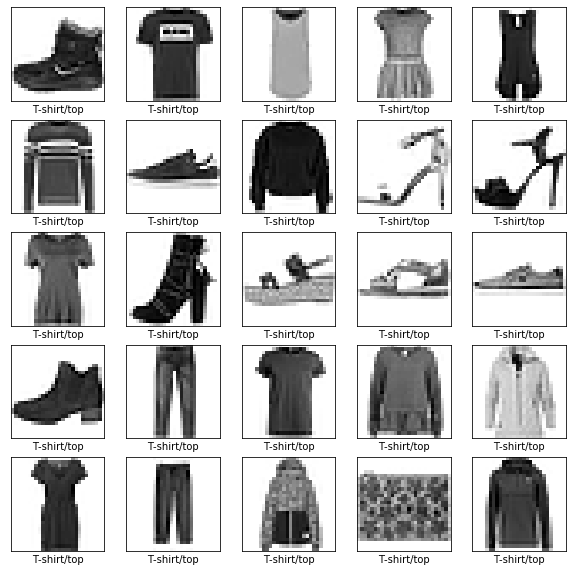

In [0]:
#Seeing the training data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[1]])

In [0]:
#Model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Model compilation
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [0]:
#Model training
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4992 - acc: 0.8246
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3760 - acc: 0.8650
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3371 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3128 - acc: 0.8833
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2931 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2780 - acc: 0.8971
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2666 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2553 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2467 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
#Model evaluation
test_acc, test_loss = model.evaluate(test_images, test_labels, verbose=2)
print('Test Accuracy:', test_loss)

10000/10000 - 0s - loss: 0.3610 - acc: 0.8782
Test Accuracy: 0.8782


In [0]:
#Making predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([1.2864501e-08, 1.1339989e-11, 7.3803385e-08, 3.8959028e-10,
       1.2852074e-07, 1.7991923e-04, 1.9795917e-07, 5.2689658e-03,
       1.5447231e-09, 9.9455076e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
#Graphing the image along with it's confidence class
def plot_image (i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  plt.ylim([0,1])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

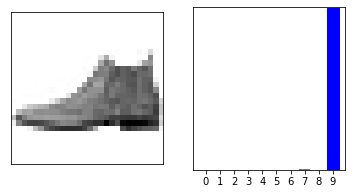

In [0]:
#Verify Predictions
i = 0
plt.figure(figsize = (6,3))
plt.subplot(121)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predictions[i], test_labels)

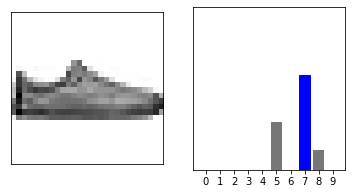

In [0]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(121)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predictions[i], test_labels)

In [0]:
#Using the trained model with a single iamge  
img = test_images[2]
img.shape

(28, 28)

In [0]:
img_reshaped = np.expand_dims(img,0)
img_reshaped.shape

(1, 28, 28)

In [0]:
predictions_single = probability_model.predict(img_reshaped)
predictions_single

array([[1.7858710e-08, 1.0000000e+00, 1.5343466e-11, 5.9233338e-09,
        1.0512495e-09, 3.3594418e-19, 5.2367164e-12, 1.7976150e-29,
        1.3047740e-14, 6.1697079e-17]], dtype=float32)

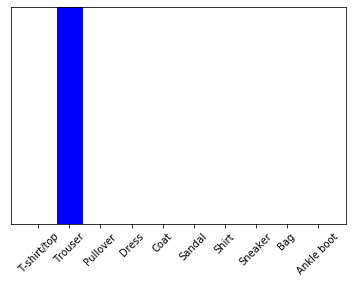

In [0]:
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

1